In [408]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
from simple_colors import *
import plotly.figure_factory as ff
import plotly as py
from itertools import cycle, islice
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
plt.style.use('fivethirtyeight')
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
import warnings
warnings.filterwarnings("ignore")
import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px
import psycopg2 as pg
import seaborn as sns

In [409]:
df = pd.read_csv('state_race.csv')
df[['Population']] = df[['Population']] .replace('[\,,]','',regex=True).astype(int)
years = [int(x) for x in input("Enter a list of year[2010 2015 2019] to test: ").split()]
#years = [2017, 2018, 2019]
df = df.loc[df.Year.isin(years)]
df

,Year,Gender,Hispanic,Race,Population,State
168,2017,Male,Non Hispanic,White,1909019,Arizona
169,2017,Male,Non Hispanic,Black or African American,157660,Arizona
170,2017,Male,Non Hispanic,American Indian and Alaska Native,136428,Arizona
171,2017,Male,Non Hispanic,Asian,110491,Arizona
172,2017,Male,Non Hispanic,Native Hawaiian and Other Pacific Islander,7185,Arizona
...,...,...,...,...,...,...
1675,2019,Female,Hispanic,Black or African American,49880,Georgia
1676,2019,Female,Hispanic,American Indian and Alaska Native,14226,Georgia
1677,2019,Female,Hispanic,Asian,4763,Georgia
1678,2019,Female,Hispanic,Native Hawaiian and Other Pacific Islander,2667,Georgia


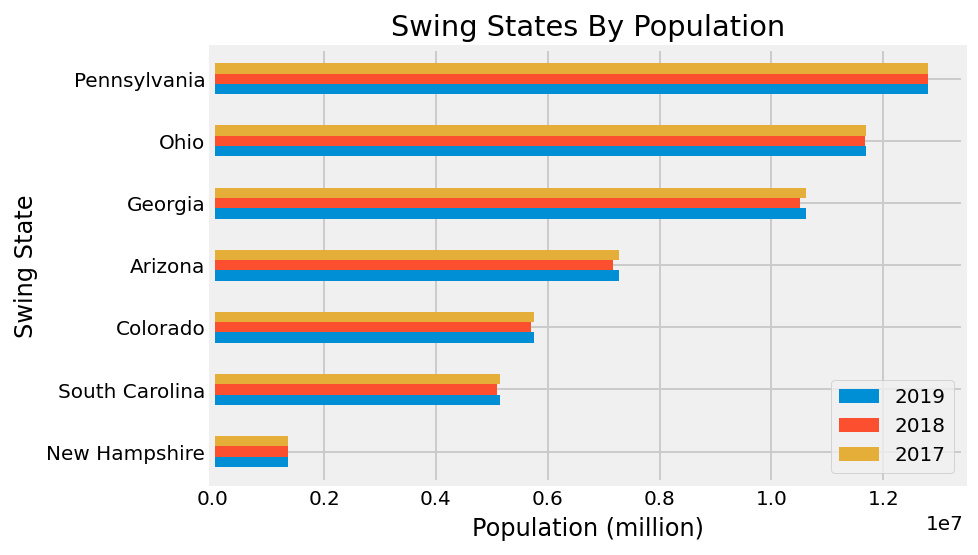

In [410]:
df1 = df.loc[df.Year.isin([years[0]])]
table_0 = df1.groupby(df['State'])['Population'].sum()
table_0 = table_0.sort_values(ascending=True)
try:
    df2 = df.loc[df.Year.isin([years[1]])]
    table_1 = df2.groupby(df['State'])['Population'].sum()
    table_1 = table_1.sort_values(ascending=True)
except:
    pass
try:
    df3 = df.loc[df.Year.isin([years[2]])]
    table_2 = df3.groupby(df['State'])['Population'].sum()
    table_2 = table_2.sort_values(ascending=True)
except:
    pass
if len(years) == 1:
    df4 = pd.DataFrame({years[0]: table_0.values.tolist()}, index=table_0.index.tolist())
elif len(years) == 2:  
    df4 = pd.DataFrame({years[1]: table_1.values.tolist(), years[0]: table_0.values.tolist()}, index=table_1.index.tolist()) 
elif len(years) == 3:
    df4 = pd.DataFrame({years[2]: table_2.values.tolist(), years[1]: table_1.values.tolist(), years[0]: table_2.values.tolist()}, index=table_2.index.tolist()) 
df4.plot.barh()
plt.xlabel('Population (million)')
plt.ylabel('Swing State')
plt.title('Swing States By Population')
plt.show()

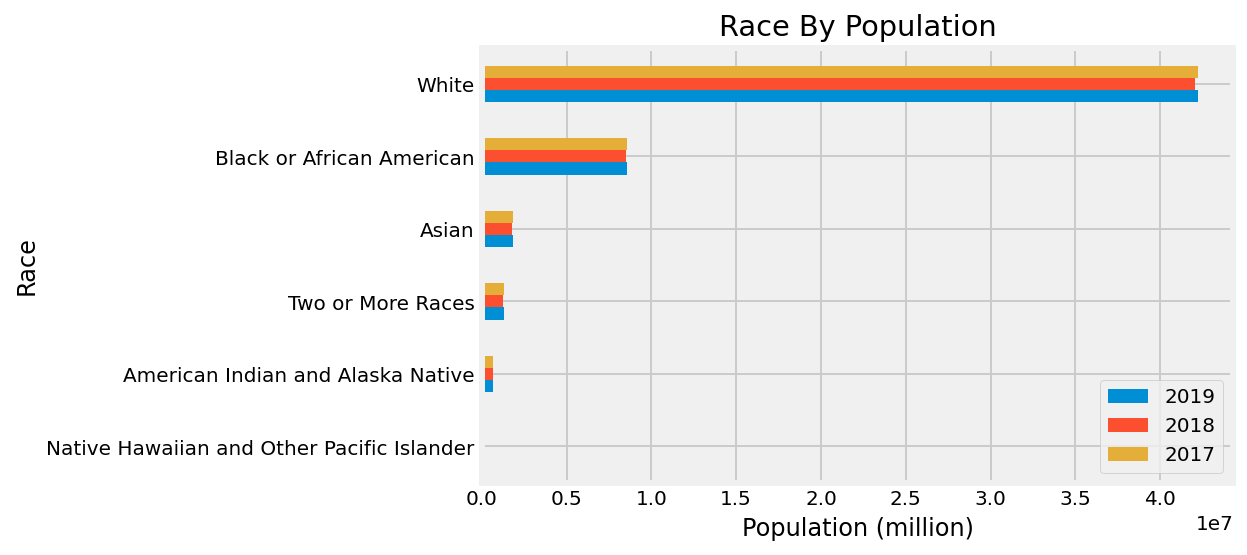

In [411]:
df1 = df.loc[df.Year.isin([years[0]])]
table_0 = df1.groupby(df['Race'])['Population'].sum()
table_0 = table_0.sort_values(ascending=True)
try:
    df2 = df.loc[df.Year.isin([years[1]])]
    table_1 = df2.groupby(df['Race'])['Population'].sum()
    table_1 = table_1.sort_values(ascending=True)
except:
    pass
try:
    df3 = df.loc[df.Year.isin([years[2]])]
    table_2 = df3.groupby(df['Race'])['Population'].sum()
    table_2 = table_2.sort_values(ascending=True)
except:
    pass
if len(years) == 1:
    df4 = pd.DataFrame({years[0]: table_0.values.tolist()}, index=table_0.index.tolist())
elif len(years) == 2:  
    df4 = pd.DataFrame({years[1]: table_1.values.tolist(), years[0]: table_0.values.tolist()}, index=table_1.index.tolist()) 
elif len(years) == 3:
    df4 = pd.DataFrame({years[2]: table_2.values.tolist(), years[1]: table_1.values.tolist(), years[0]: table_2.values.tolist()}, index=table_2.index.tolist()) 
df4.plot.barh()
plt.xlabel('Population (million)')
plt.ylabel('Race')
plt.title('Race By Population')
plt.show()

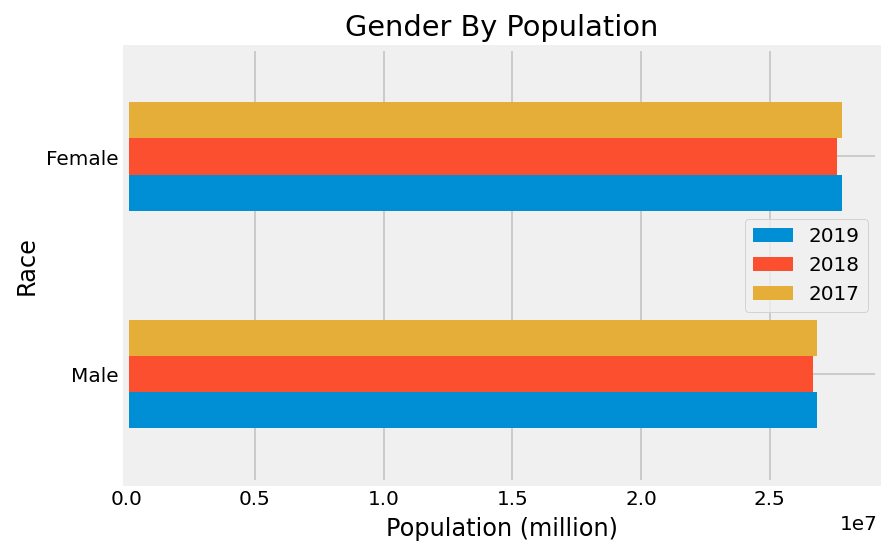

In [412]:
df1 = df.loc[df.Year.isin([years[0]])]
table_0 = df1.groupby(df['Gender'])['Population'].sum()
table_0 = table_0.sort_values(ascending=True)
try:
    df2 = df.loc[df.Year.isin([years[1]])]
    table_1 = df2.groupby(df['Gender'])['Population'].sum()
    table_1 = table_1.sort_values(ascending=True)
except:
    pass
try:
    df3 = df.loc[df.Year.isin([years[2]])]
    table_2 = df3.groupby(df['Gender'])['Population'].sum()
    table_2 = table_2.sort_values(ascending=True)
except:
    pass
if len(years) == 1:
    df4 = pd.DataFrame({years[0]: table_0.values.tolist()}, index=table_0.index.tolist())
elif len(years) == 2:  
    df4 = pd.DataFrame({years[1]: table_1.values.tolist(), years[0]: table_0.values.tolist()}, index=table_1.index.tolist()) 
elif len(years) == 3:
    df4 = pd.DataFrame({years[2]: table_2.values.tolist(), years[1]: table_1.values.tolist(), years[0]: table_2.values.tolist()}, index=table_2.index.tolist()) 
df4.plot.barh()
plt.xlabel('Population (million)')
plt.ylabel('Race')
plt.title('Gender By Population')
plt.show()

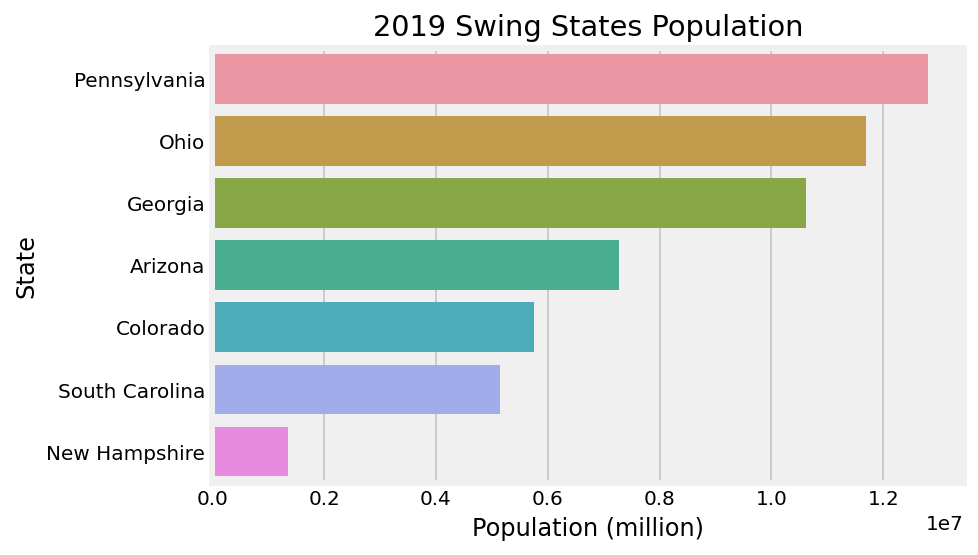

In [413]:
years = [2019]
df = df.loc[df.Year.isin(years)]
table_count = df.groupby(df['State'])['Population'].sum()
table_count = table_count.sort_values(ascending=False)
y = table_count.index
x = table_count.values
ax = sns.barplot(x = x,y=y,orient='h')
#props = dict(boxstyle='round', facecolor='wheat', alpha=0.3)
#plt.annotate("EPI", xy=(0.5, 0.5), fontsize=15, xycoords='axes fraction', bbox=props)
plt.ylabel('State')
plt.xlabel('Population (million)')
ax.set_title("2019 Swing States Population")
plt.show()